<a href="https://colab.research.google.com/github/andrewgonzalez4/LinearRegressionExample/blob/master/LinearRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

## Data importing and organization

In [48]:
# Read the data and store it in a data frame.
data = pd.read_csv('student-mat.csv', sep = ';')
# Select only the relevant features of said data.
data = data[['G1','G2','G3', 'traveltime', 'failures', 'freetime', 'absences']]
# Print the first 5 elements of the data.
print(data.head())


   G1  G2  G3  traveltime  failures  freetime  absences
0   5   6   6           2         0         3         6
1   5   5   6           1         0         3         4
2   7   8  10           1         3         3        10
3  15  14  15           1         0         2         2
4   6  10  10           1         0         3         4


## Separation in train and test data.

In [62]:
# Determine the desired prediction.
predict = 'G3'
# Drop the desired output from the original data and store in X and Y arrays.
X = np.array(data.drop([predict], 1))
Y = np.array(data[predict])
# Desired model accuracy on training. WARNING: This may cause overfitting.
desired = 95
# Train the model until the accuracy is the one desired.
while True:
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.1) #The test data size will be 10%.
  linear = linear_model.LinearRegression()
  linear.fit(x_train,y_train)
  acc = 100 * linear.score(x_test,y_test)
  print(acc)
  # If the accuracy is greater than or equal the desired one, save the model for future use.
  if acc >= desired:
    with open('studentmodel.pickle', 'wb') as f:
      pickle.dump(linear, f)
    break

67.77213220880668
85.31110921927014
77.19917149172308
89.26870879282549
82.06222934099208
70.60173188427648
76.78918363191445
83.6422952853074
87.66187324216996
83.29279147184364
82.94355204449002
85.36053966984976
86.6814063182094
93.24398675594252
94.00167370052718
69.14501598561561
76.49277408754718
84.90227275722107
82.46547407167817
92.66787218260886
82.3221383460644
85.02300183868896
79.15052503620701
73.82755264583196
85.01459403620639
77.90939080990296
83.06671317086683
71.40826342997258
86.37291190705537
84.92536460678896
83.05903258319857
90.32641049214023
83.56085828522535
84.38439092141675
84.38604699204562
85.70985317589178
83.65206011041528
80.92330163784561
93.5911704018904
85.48257559524788
86.06772706968883
83.97068038371481
79.46674234876153
77.06733865431052
84.94953409210635
81.94518797402452
75.01284001694262
87.51724844340063
83.50420602834221
78.38957092446012
87.17506909888996
79.66345026377792
80.8184037857125
81.66756768427781
89.37093327226503
81.024234745165

In [64]:
# Print the accuracy, coeficients and the y-intercept.
print("The accuracy is: {}% \n".format(acc))
print("Coeficients: {} \n".format(linear.coef_))
print("Y-intercept = {} \n".format(linear.intercept_))

The accuracy is: 95.12765894125133% 

Coeficients: [ 0.15064406  0.98868017  0.10372346 -0.26183242  0.16590141  0.03920616] 

Y-intercept = -2.6704847968007854 



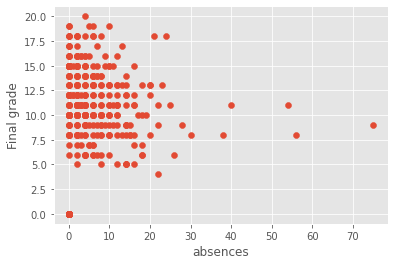

In [65]:
# Plot the data in relation to the final grade.
p = 'absences'
style.use('ggplot')
plt.scatter(data[p], data['G3'])
plt.xlabel(p)
plt.ylabel("Final grade")
plt.show()